# Logitische Regression (50 Punkte)

Ihre Aufgabe in diesem Notebook ist die Umsetzung einer **univariate** logistische Regression, d.h. folgendes Modell:

$$ Input: \vec{x}^T = (x_1, x_2, ... , x_n) $$ 
$$ Output\: h\: des\: Neurons: h = \sigma(\sum_{i=1}^{n} w_i x_i + b) = \sigma( \vec{x}^T \vec{w} + b)$$ 
$$ Logistische\: Funktion: \sigma(z) = \dfrac{1}{(1+e^{-z})}$$
$$ Neuronengewichte: w_i$$
$$ Bias: b$$

Erweitern Sie das Notebook unter folgenden Aspekten: 
- (15) Implementieren Sie das Modell mit Tensorflow und den gegebenen Daten.
- (25) Optimieren Sie die Kosten (cross-entropy und L2-Regularisierung) mit Tensorflow, verwenden Sie hierzu den tf.train.GradientDescentOptimizer. 
$$ J(\vec{w},b) = - \dfrac{1}{m}(y log(h_{\vec{w}, b}(\vec{x}) + (1 - y) log ( 1 - h_{\vec{w}, b} (\vec{x} )) + \lambda \sum_i w_i^2 $$
Zeichen Sie einen Plot des den Fortschittes (Abnahme der Kosten über den Iterationen).

<img src="ak1163051/pics/logreg_learning_rate.png", width=400>

- (5) Geben Sie die gefundenen Parameter aus (einfaches print)
- (5) Zeichen Sie die Daten zusammen mit der Entscheidungsgrenze.

<img src="ak1163051/pics/logreg_decision_boundary.png", width=400>

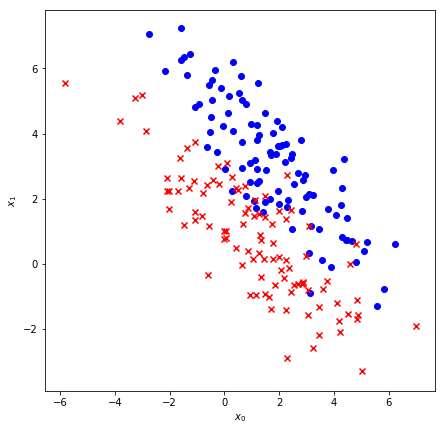

In [9]:
# imports
import numpy as np
import matplotlib.pyplot as plt

# class 0:
# covariance matrix and mean
cov0 = np.array([[5,-4],[-4,4]])
mean0 = np.array([2.,3])
# number of data points
m0 = 100

# class 1
# covariance matrix
cov1 = np.array([[5,-3],[-3,3]])
mean1 = np.array([1.,1])
m1 = 100

# generate m0 gaussian distributed data points with
# mean0 and cov0.
r0 = np.random.multivariate_normal(mean0, cov0, m0)
r1 = np.random.multivariate_normal(mean1, cov1, m1)

def plot_data(r0, r1):
    plt.figure(figsize=(7.,7.))
    plt.scatter(r0[...,0], r0[...,1], c='b', marker='o', label="Klasse 0")
    plt.scatter(r1[...,0], r1[...,1], c='r', marker='x', label="Klasse 1")
    plt.xlabel("$x_0$")
    plt.ylabel("$x_1$")
    plt.show()
    
plot_data(r0,r1)    